In [2]:
import pandas as pd
df = pd.read_csv('mfp-diaries.tsv', sep='\t',header=None)


In [3]:
df

,0,1,2,3
0,1,2014-09-14,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2924}..."
1,1,2014-09-15,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2430}..."
2,1,2014-09-16,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 1862}..."
3,1,2014-09-17,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2251}..."
4,1,2014-09-18,"[{""meal"": ""MY food"", ""dishes"": [{""nutritions"":...","{""total"": [{""name"": ""Calories"", ""value"": 2001}..."
...,...,...,...,...
587182,9897,2015-03-02,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 1979}..."
587183,9897,2015-03-03,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2141}..."
587184,9897,2015-03-04,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 543},..."
587185,9897,2015-03-14,"[{""meal"": ""Breakfast"", ""dishes"": [{""nutritions...","{""total"": [{""name"": ""Calories"", ""value"": 2024}..."


In [165]:
for i in df[0].unique():
    new_df = df[df[0] == i]
    
    

'{"total": [{"name": "Calories", "value": 2924}, {"name": "Carbs", "value": 340}, {"name": "Fat", "value": 114}, {"name": "Protein", "value": 186}, {"name": "Sodium", "value": 3658}, {"name": "Sugar", "value": 109}], "goal": [{"name": "Calories", "value": 3173}, {"name": "Carbs", "value": 396}, {"name": "Fat", "value": 105}, {"name": "Protein", "value": 160}, {"name": "Sodium", "value": 2300}, {"name": "Sugar", "value": 119}]}{"total": [{"name": "Calories", "value": 2430}, {"name": "Carbs", "value": 96}, {"name": "Fat", "value": 37}, {"name": "Protein", "value": 50}, {"name": "Sodium", "value": 855}, {"name": "Sugar", "value": 63}], "goal": [{"name": "Calories", "value": 1572}, {"name": "Carbs", "value": 196}, {"name": "Fat", "value": 52}, {"name": "Protein", "value": 79}, {"name": "Sodium", "value": 2300}, {"name": "Sugar", "value": 59}]}{"total": [{"name": "Calories", "value": 1862}, {"name": "Carbs", "value": 158}, {"name": "Fat", "value": 54}, {"name": "Protein", "value": 114}, {"n

In [4]:
#make data set for each user
user1 = df[df[0] == 1]


In [6]:
# #take the 3rd column it being a list containing a dictionary and add separate row for each item
new_user_1 = {}
i = 0
for index, row in user1.iterrows():
    for item in eval(row[2]):
        # print(item)
        for dish in item['dishes']:
            new_user_1[i] = {'date':row[1], 'dish':dish['name'], 'calories':[int(i['value'].replace(',','')) for i in dish['nutritions']]}
            i+=1
            

In [7]:
user1_food = pd.DataFrame.from_dict(new_user_1, orient='index')

In [8]:
user1_food

,date,dish,calories
0,2014-09-14,"my - McDonalds Espresso Pronto® Flat White, 2 ...","[412, 29, 24, 21, 258, 29]"
1,2014-09-14,Quest Bar - Banana Nut Muffin Natural Protein ...,"[170, 25, 5, 20, 260, 2]"
2,2014-09-14,"Uncle Tobys Australia - Vita Brits, 3 Biscuits...","[176, 33, 1, 5, 195, 0]"
3,2014-09-14,"Pauls - Smarter White Milk, 600 ml","[342, 34, 12, 24, 402, 34]"
4,2014-09-14,"Quest Bar - Cookies and Cream, 1 bar","[180, 22, 7, 21, 310, 1]"
...,...,...,...
1423,2015-03-12,"my - McDonalds Espresso Pronto® Flat White, 1 ...","[206, 15, 12, 10, 129, 15]"
1424,2015-03-12,"Pauls - Smarter White Milk, 500 ml","[285, 29, 10, 20, 335, 29]"
1425,2015-03-12,"Uncle Tobys Australia - Vita Brits, 3 Biscuits...","[176, 33, 1, 5, 195, 0]"
1426,2015-03-12,"Redbak - Sting-chocolate, 40 g","[145, 2, 1, 32, 70, 1]"


In [9]:
#expand the calories column into separate columns named after the calories
user_food_expanded = pd.concat([user1_food.drop(['calories'], axis=1), user1_food['calories'].apply(pd.Series)], axis=1)

In [10]:
user_food_expanded

,date,dish,0,1,2,3,4,5
0,2014-09-14,"my - McDonalds Espresso Pronto® Flat White, 2 ...",412,29,24,21,258,29
1,2014-09-14,Quest Bar - Banana Nut Muffin Natural Protein ...,170,25,5,20,260,2
2,2014-09-14,"Uncle Tobys Australia - Vita Brits, 3 Biscuits...",176,33,1,5,195,0
3,2014-09-14,"Pauls - Smarter White Milk, 600 ml",342,34,12,24,402,34
4,2014-09-14,"Quest Bar - Cookies and Cream, 1 bar",180,22,7,21,310,1
...,...,...,...,...,...,...,...,...
1423,2015-03-12,"my - McDonalds Espresso Pronto® Flat White, 1 ...",206,15,12,10,129,15
1424,2015-03-12,"Pauls - Smarter White Milk, 500 ml",285,29,10,20,335,29
1425,2015-03-12,"Uncle Tobys Australia - Vita Brits, 3 Biscuits...",176,33,1,5,195,0
1426,2015-03-12,"Redbak - Sting-chocolate, 40 g",145,2,1,32,70,1


In [11]:
#rename the columns 0 1 2 3 4 5 as Calories Carbs Fat Protein Sodium Sugar respectively
user_food_expanded.rename(columns={0:'Calories', 1:'Carbs', 2:'Fat', 3:'Protein', 4:'Sodium', 5:'Sugar'}, inplace=True)

In [12]:
user_food_expanded

,date,dish,Calories,Carbs,Fat,Protein,Sodium,Sugar
0,2014-09-14,"my - McDonalds Espresso Pronto® Flat White, 2 ...",412,29,24,21,258,29
1,2014-09-14,Quest Bar - Banana Nut Muffin Natural Protein ...,170,25,5,20,260,2
2,2014-09-14,"Uncle Tobys Australia - Vita Brits, 3 Biscuits...",176,33,1,5,195,0
3,2014-09-14,"Pauls - Smarter White Milk, 600 ml",342,34,12,24,402,34
4,2014-09-14,"Quest Bar - Cookies and Cream, 1 bar",180,22,7,21,310,1
...,...,...,...,...,...,...,...,...
1423,2015-03-12,"my - McDonalds Espresso Pronto® Flat White, 1 ...",206,15,12,10,129,15
1424,2015-03-12,"Pauls - Smarter White Milk, 500 ml",285,29,10,20,335,29
1425,2015-03-12,"Uncle Tobys Australia - Vita Brits, 3 Biscuits...",176,33,1,5,195,0
1426,2015-03-12,"Redbak - Sting-chocolate, 40 g",145,2,1,32,70,1


#### Make a Pivot table on date and final total nutrients for each day

In [13]:
user1_total = user_food_expanded.groupby('date').sum()

In [14]:
user1_total

,Calories,Carbs,Fat,Protein,Sodium,Sugar
date,,,,,,
2014-09-14,2924,340,114,186,3658,109
2014-09-15,2430,96,37,50,855,63
2014-09-16,1862,158,54,114,2215,100
2014-09-17,2251,187,60,98,1765,105
2014-09-18,2001,113,81,202,1101,71
...,...,...,...,...,...,...
2015-03-08,4122,464,196,168,5787,125
2015-03-09,3009,226,88,74,3081,62
2015-03-10,2432,258,109,94,3214,74


#### Making a scatter plot for daily

<AxesSubplot:xlabel='date', ylabel='Calories'>

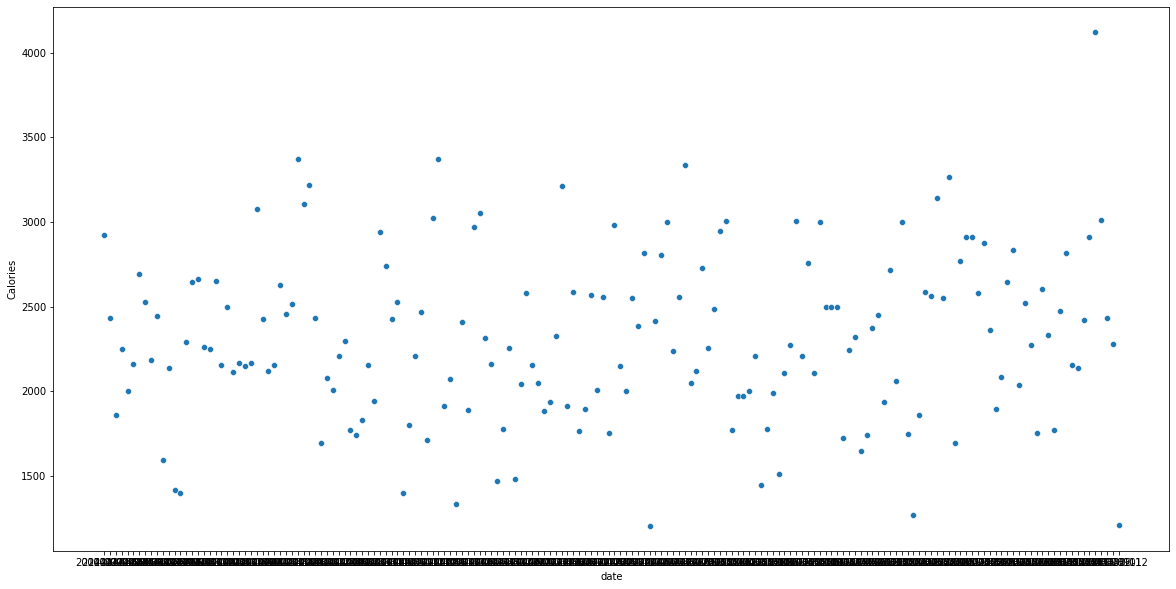

In [15]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
sns.scatterplot(x='date', y='Calories', data=user1_total,)

In [134]:
#converting date to datetime
user1_total.index = pd.to_datetime(user1_total.index)


In [149]:
user1_total_week = user1_total.groupby(user1_total.index.week).mean().drop('weekday', axis=1)
user1_total_week = user1_total_week.astype(int)
user1_total_week

/Users/ipriyam26/Programing/Data Science/myfitnessPal/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,Calories,Carbs,Fat,Protein,Sodium,Sugar
date,,,,,,
1,2511,214,88,123,2197,115
2,1876,209,65,127,2067,101
3,2265,217,92,148,2353,96
4,2367,66,33,59,568,40
5,2168,233,87,133,2311,107
6,2153,132,79,127,1652,46
7,2749,150,55,103,1550,57
8,2466,196,85,147,1948,94
9,2183,191,97,142,2504,88


In [150]:
#reset index to make week number a column
user1_total_week.reset_index(inplace=True)
user_weekly_reset = user1_total_week[11:] 
user_weekly_reset.reset_index(inplace=True)
user_weekly_reset.drop('index', axis=1, inplace=True)
user_weekly_reset = user_weekly_reset.append(user1_total_week[:10])
#reset index to make week number a column
user_weekly_reset.reset_index(inplace=True)
user_weekly_reset.drop('index', axis=1, inplace=True)

/Users/ipriyam26/Programing/Data Science/myfitnessPal/venv/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [151]:
user_weekly_reset

,date,Calories,Carbs,Fat,Protein,Sodium,Sugar
0,37,2924,340,114,186,3658,109
1,38,2273,177,67,132,1879,95
2,39,1923,160,66,163,2271,69
3,40,2436,211,73,141,2651,81
4,41,2371,153,76,165,1466,83
5,42,2621,268,87,151,2830,112
6,43,2275,193,74,111,2010,88
7,44,2063,166,93,101,2295,84
8,45,2563,213,60,120,910,75
9,46,2282,205,90,136,2368,91


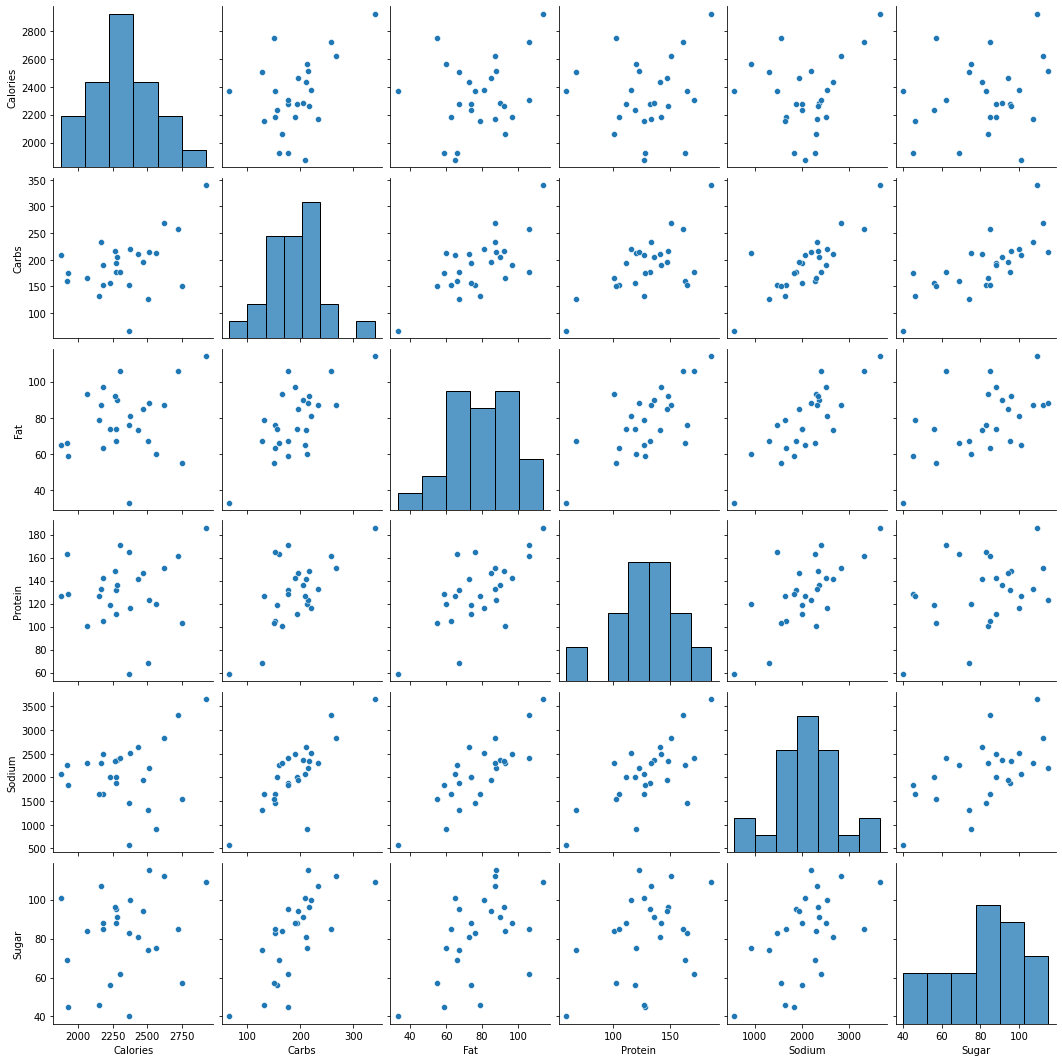

In [154]:
sns.pairplot(user_weekly_reset.drop('date', axis=1))

<AxesSubplot:xlabel='index', ylabel='Calories'>

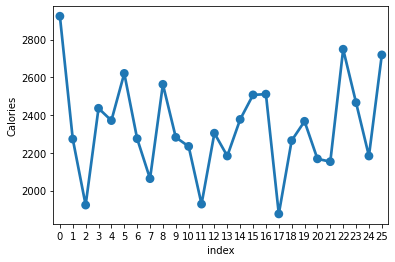

In [164]:
sns.scatterplot(x='index', y='Calories', data=user_weekly_reset.reset_index(),)
sns.pointplot(x='index', y='Calories', data=user_weekly_reset.reset_index(),)

In [18]:
user1_total.index

DatetimeIndex(['2014-09-14', '2014-09-15', '2014-09-16', '2014-09-17',
               '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
               '2014-09-22', '2014-09-23',
               ...
               '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06',
               '2015-03-07', '2015-03-08', '2015-03-09', '2015-03-10',
               '2015-03-11', '2015-03-12'],
              dtype='datetime64[ns]', name='date', length=174, freq=None)

<AxesSubplot:xlabel='date', ylabel='Calories'>

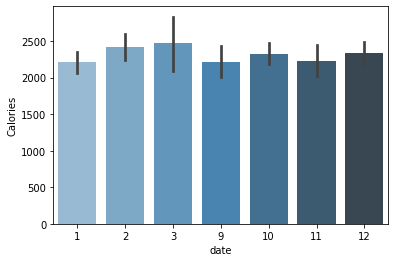

In [23]:
# plot the calories for each week
sns.barplot(x=user1_total.index.month, y='Calories', data=user1_total,palette='Blues_d')


<AxesSubplot:xlabel='date', ylabel='Calories'>

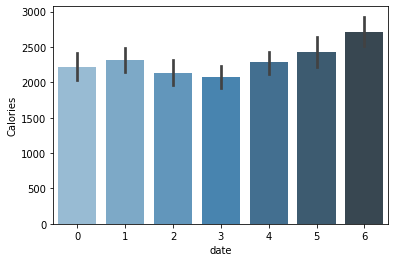

In [24]:
#lets compare weekdays and weekends
sns.barplot(x=user1_total.index.dayofweek, y='Calories', data=user1_total,palette='Blues_d')

In [38]:
#lets compare weekdays and weekends
user1_total['weekday'] = user1_total.index.dayofweek<5

<AxesSubplot:xlabel='date', ylabel='Calories'>

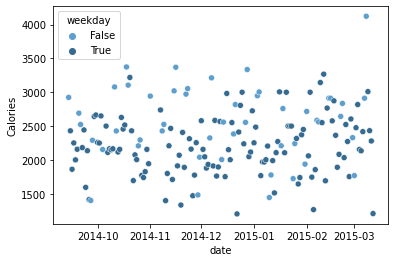

In [42]:
# sns.barplot(x=user1_total.index.dayofweek, y='Calories', data=user1_total,palette='Blues_d', hue='weekday')
sns.scatterplot(x=user1_total.index, y='Calories', data=user1_total,palette='Blues_d', hue='weekday')


<AxesSubplot:xlabel='date', ylabel='Calories'>

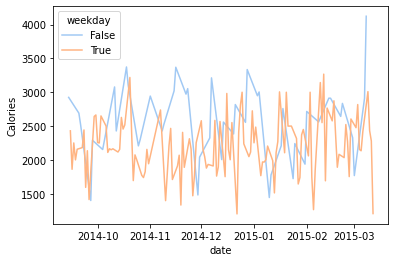

In [87]:
sns.lineplot(x=user1_total.index, y='Calories', data=user1_total,palette='pastel', hue='weekday')

In [44]:
user1_food

,date,dish,calories
0,2014-09-14,"my - McDonalds Espresso Pronto® Flat White, 2 ...","[412, 29, 24, 21, 258, 29]"
1,2014-09-14,Quest Bar - Banana Nut Muffin Natural Protein ...,"[170, 25, 5, 20, 260, 2]"
2,2014-09-14,"Uncle Tobys Australia - Vita Brits, 3 Biscuits...","[176, 33, 1, 5, 195, 0]"
3,2014-09-14,"Pauls - Smarter White Milk, 600 ml","[342, 34, 12, 24, 402, 34]"
4,2014-09-14,"Quest Bar - Cookies and Cream, 1 bar","[180, 22, 7, 21, 310, 1]"
...,...,...,...
1423,2015-03-12,"my - McDonalds Espresso Pronto® Flat White, 1 ...","[206, 15, 12, 10, 129, 15]"
1424,2015-03-12,"Pauls - Smarter White Milk, 500 ml","[285, 29, 10, 20, 335, 29]"
1425,2015-03-12,"Uncle Tobys Australia - Vita Brits, 3 Biscuits...","[176, 33, 1, 5, 195, 0]"
1426,2015-03-12,"Redbak - Sting-chocolate, 40 g","[145, 2, 1, 32, 70, 1]"


In [50]:
food_item_order = user1_food.groupby('dish').count().sort_values('date', ascending=False)
food_item_order

,date,calories
dish,,
"my - McDonalds Espresso Pronto® Flat White, 1 TALL",157,157
"Redbak - Sting-chocolate, 40 g",105,105
"my - McDonalds Espresso Pronto® Flat White, 2 TALL",74,74
"Gatorade - Lemon-Lime (Australia), 600 ml",73,73
"Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g",71,71
...,...,...
"Generic - Pork Dumplings - Steamed, 8 Dumpling",1,1
"Grilld - Simply Grilled (Real), 1.25 burger",1,1
"Grilld - Simply Grilled (Real), 1.5 burger",1,1


[Text(-0.7218962232105708, 0.8299794231872946, 'my - McDonalds Espresso Pronto® Flat White, 1 TALL'),
 Text(-1.037142617703688, -0.36651765379411416, 'Redbak - Sting-chocolate, 40 g'),
 Text(-0.44343580200342986, -1.006660165846238, 'my - McDonalds Espresso Pronto® Flat White, 2 TALL'),
 Text(0.2778317064525799, -1.0643352586895012, 'Gatorade - Lemon-Lime (Australia), 600 ml'),
 Text(0.8697542463730228, -0.6734445418266418, 'Uncle Tobys Australia - Vita Brits, 3 Biscuits 33.3g'),
 Text(1.0919797562557798, -0.1325903915356152, 'Quest Bar - Cookies and Cream, 1 bar'),
 Text(1.0513059452149613, 0.3236600215591613, 'Wonder White - Toast White Bread, 2 slice'),
 Text(0.8446158640242443, 0.7047155754193174, 'Pauls - Smarter White Milk, 500 ml'),
 Text(0.5288739467711231, 0.9645166397873784, 'Quest - White Chocolate Raspberry, 60 g'),
 Text(0.17480206845892016, 1.0860222082731472, 'Pauls - Smarter White Milk, 600 ml')]

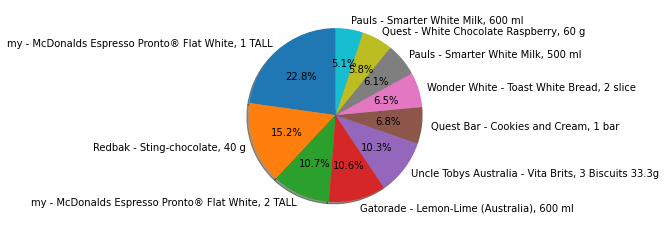

In [77]:
plt.pie(food_item_order['date'][:10], labels=food_item_order[:10].index, autopct='%1.1f%%', shadow=True, startangle=90)[1]

In [74]:

#see the break up of calories eaten by throught the day
calorie_break = user1_total.sum()
sugar = calorie_break['Sugar']
calorie_break.drop(['Sodium','weekday','Calories'], inplace=True)
calorie_break

Carbs      32265
Fat        13562
Protein    22408
Sugar      14227
dtype: int64

In [75]:
calorie_break['Carbs'] = calorie_break['Carbs'] - sugar

([<matplotlib.patches.Wedge at 0x7fc24bddeba8>,
 [Text(-0.8120833953457414, 0.7419707265140133, 'Carbs'),
  Text(-0.8309083511482466, -0.7208268252445259, 'Fat'),
  Text(0.7889893765354853, -0.7664827223846251, 'Protein'),
  Text(0.670094453774143, 0.8723379064451647, 'Sugar')],
 [Text(-0.4429545792794952, 0.4047113053712799, '26.4%'),
  Text(-0.45322273698995263, -0.3931782683151959, '19.9%'),
  Text(0.4303578417466283, -0.4180814849370682, '32.8%'),
  Text(0.36550606569498706, 0.4758206762428171, '20.9%')])

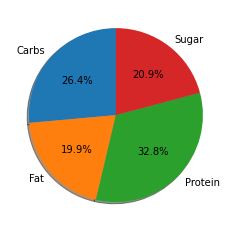

In [76]:
plt.pie(calorie_break, labels=calorie_break.index, autopct='%1.1f%%', shadow=True, startangle=90)

In [78]:
average_calories = user1_total.mean()

In [79]:
average_calories

Calories    2308.908046
Carbs        185.431034
Fat           77.942529
Protein      128.781609
Sodium      2071.764368
Sugar         81.764368
weekday        0.718391
dtype: float64

<AxesSubplot:ylabel='None'>

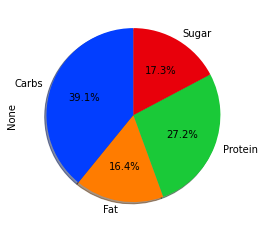

In [84]:

palette_color = sns.color_palette('bright')
average_calories.drop(['Sodium','weekday','Calories']).plot.pie(autopct='%1.1f%%', shadow=True, startangle=90, colors=palette_color)